In [18]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
path='/content/Pokemon.csv'
df = pd.read_csv(path)

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display the first 5 rows
print("\nFirst 5 Rows:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB

First 5 Rows:
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60     

In [19]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [20]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [21]:
# Remove duplicate records
df.drop_duplicates(inplace=True)
print("\nDuplicate records removed.")


Duplicate records removed.


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("\nOutliers treated using IQR method.")



Outliers treated using IQR method.


In [24]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()

In [25]:
print("\nCleaned Dataset Info:")
df.info()
print("\nFirst 5 rows of Cleaned Data:")
print(df.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           739 non-null    int64 
 1   Name        739 non-null    object
 2   Type 1      739 non-null    object
 3   Type 2      739 non-null    object
 4   Total       739 non-null    int64 
 5   HP          739 non-null    int64 
 6   Attack      739 non-null    int64 
 7   Defense     739 non-null    int64 
 8   Sp. Atk     739 non-null    int64 
 9   Sp. Def     739 non-null    int64 
 10  Speed       739 non-null    int64 
 11  Generation  739 non-null    int64 
 12  Legendary   739 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.8+ KB

First 5 rows of Cleaned Data:
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              bulbasaur  grass  poison    318  45      49       49   
1  2                ivysaur  grass  po

In [26]:
import pandas as pd
from scipy import stats


# Selecting only numerical columns
numerical_columns = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
summary_stats = {}

# Compute summary statistics
for col in numerical_columns:
    summary_stats[col] = {
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": df[col].mode()[0],
        "Variance": df[col].var(),
        "Skewness": stats.skew(df[col]),
        "Kurtosis": stats.kurtosis(df[col])
    }

# Convert to DataFrame for better visualization
summary_stats_df = pd.DataFrame(summary_stats).T

# Display summary statistics
print(summary_stats_df)


               Mean  Median   Mode      Variance  Skewness  Kurtosis
Total    423.320704   430.0  600.0  12737.895655  0.063305 -0.714636
HP        66.719892    65.0   60.0    429.594875  0.311997 -0.306743
Attack    77.438430    75.0   65.0    940.875269  0.452094 -0.172802
Defense   71.227334    70.0   70.0    709.560715  0.509105 -0.175241
Sp. Atk   70.872801    65.0   60.0    919.024449  0.569398 -0.230173
Sp. Def   69.307172    66.0   80.0    593.820152  0.356594 -0.408875
Speed     67.755074    65.0   60.0    796.496841  0.262646 -0.564395


In [27]:
# Selecting categorical columns
categorical_columns = ["Type 1", "Type 2", "Generation", "Legendary"]

# Compute frequency distributions
frequency_distributions = {col: df[col].value_counts() for col in categorical_columns}

# Convert to a DataFrame for better visualization
frequency_distributions_df = pd.concat(frequency_distributions, axis=1)

# Display frequency distributions
print(frequency_distributions_df)


          Type 1  Type 2  Generation  Legendary
water      102.0    14.0         NaN        NaN
normal      92.0     4.0         NaN        NaN
grass       70.0    25.0         NaN        NaN
bug         65.0     3.0         NaN        NaN
fire        51.0    11.0         NaN        NaN
psychic     47.0    31.0         NaN        NaN
electric    43.0     6.0         NaN        NaN
rock        38.0    12.0         NaN        NaN
ground      31.0    31.0         NaN        NaN
dark        30.0    19.0         NaN        NaN
poison      28.0    33.0         NaN        NaN
ghost       28.0    12.0         NaN        NaN
dragon      26.0    15.0         NaN        NaN
fighting    26.0    24.0         NaN        NaN
ice         22.0    10.0         NaN        NaN
steel       21.0    20.0         NaN        NaN
fairy       15.0    19.0         NaN        NaN
flying       4.0   450.0         NaN        NaN
5            NaN     NaN       162.0        NaN
1            NaN     NaN       154.0    

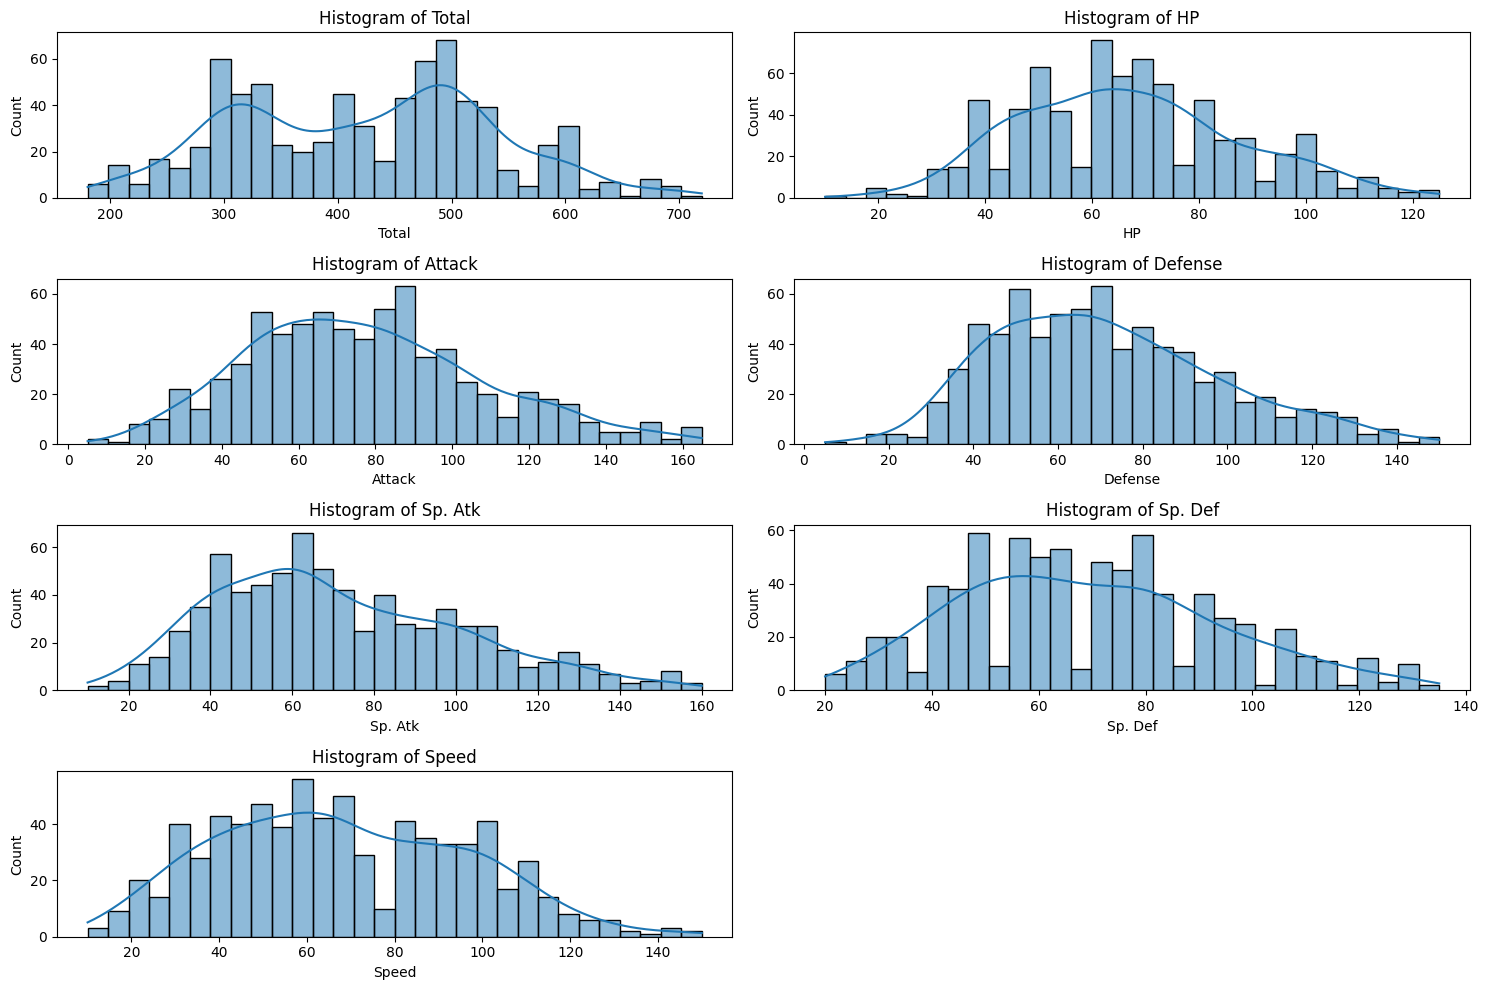

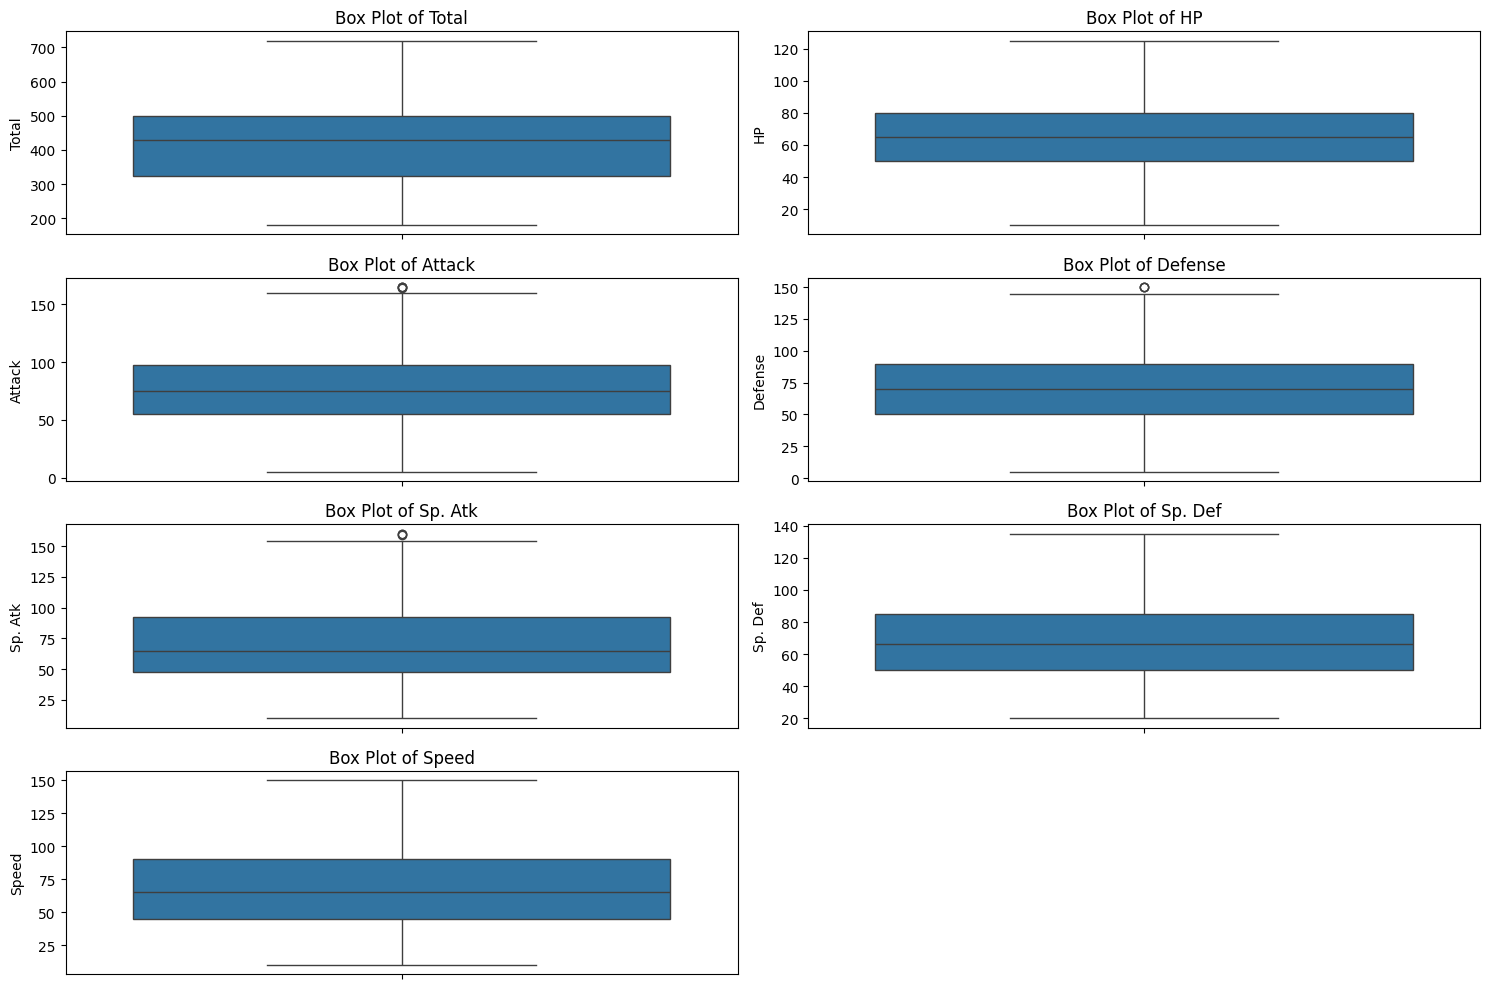

In [28]:
# Visualizations
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

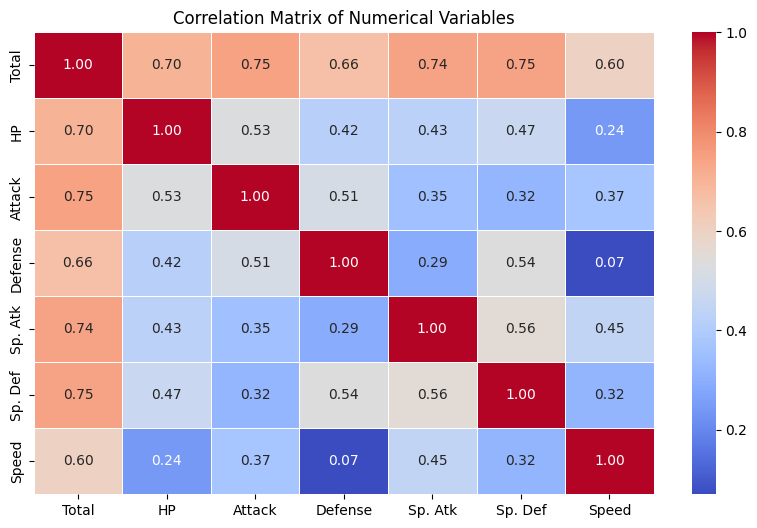

In [29]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


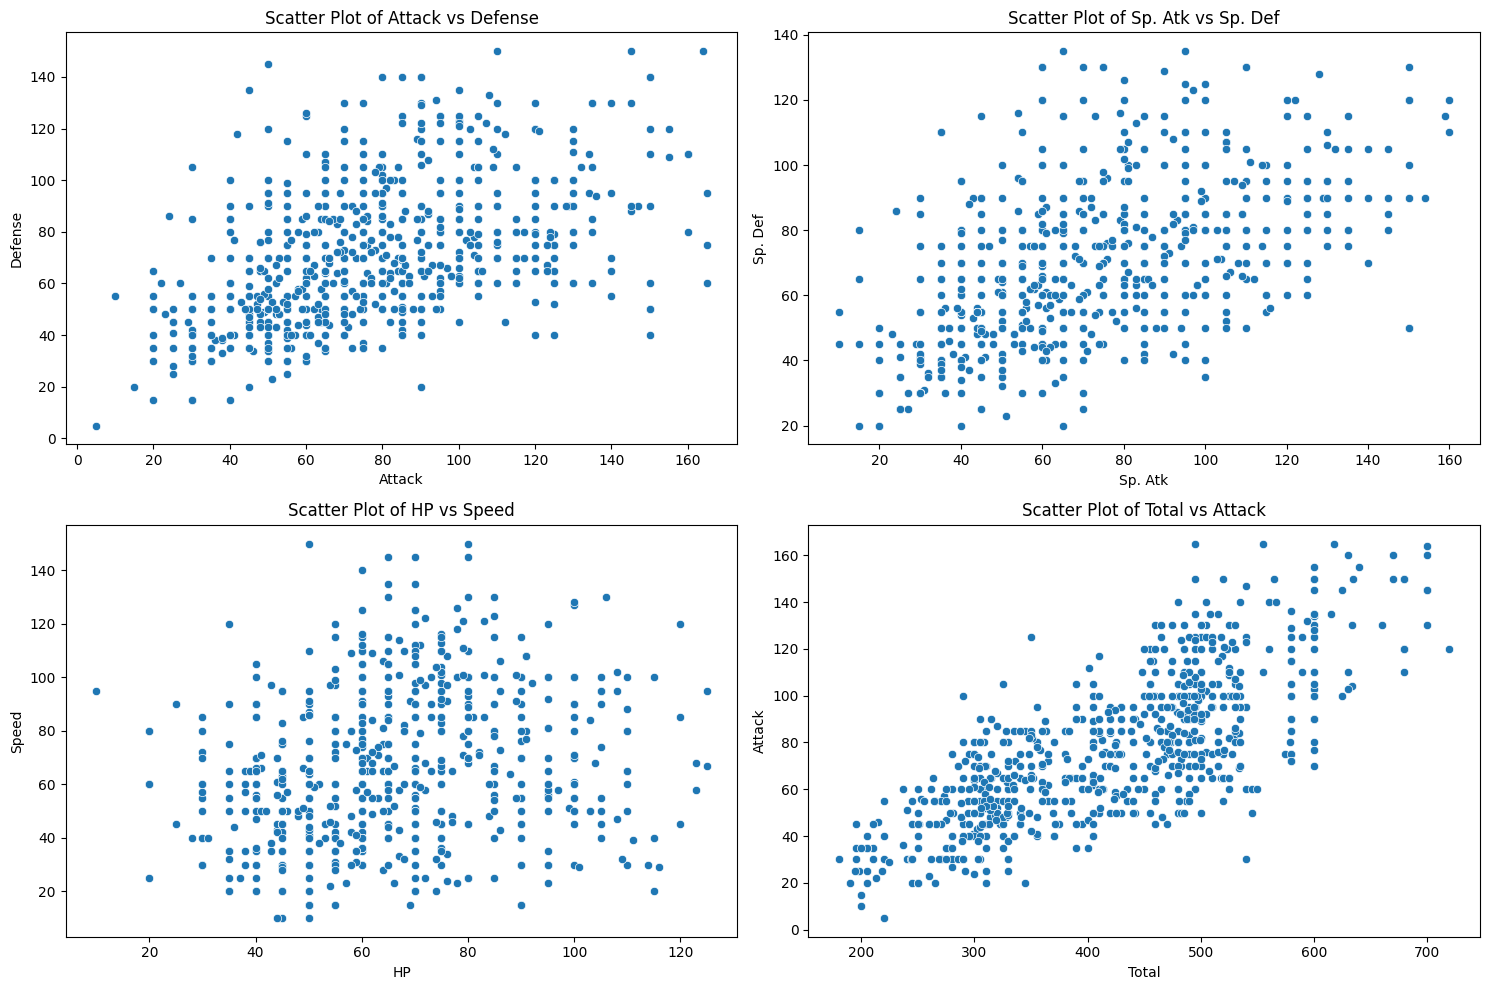

In [30]:
# Scatter Plots
plt.figure(figsize=(15, 10))
num_pairs = [("Attack", "Defense"), ("Sp. Atk", "Sp. Def"), ("HP", "Speed"), ("Total", "Attack")]
for i, (x_col, y_col) in enumerate(num_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[x_col], y=df[y_col])
    plt.title(f'Scatter Plot of {x_col} vs {y_col}')
plt.tight_layout()
plt.show()


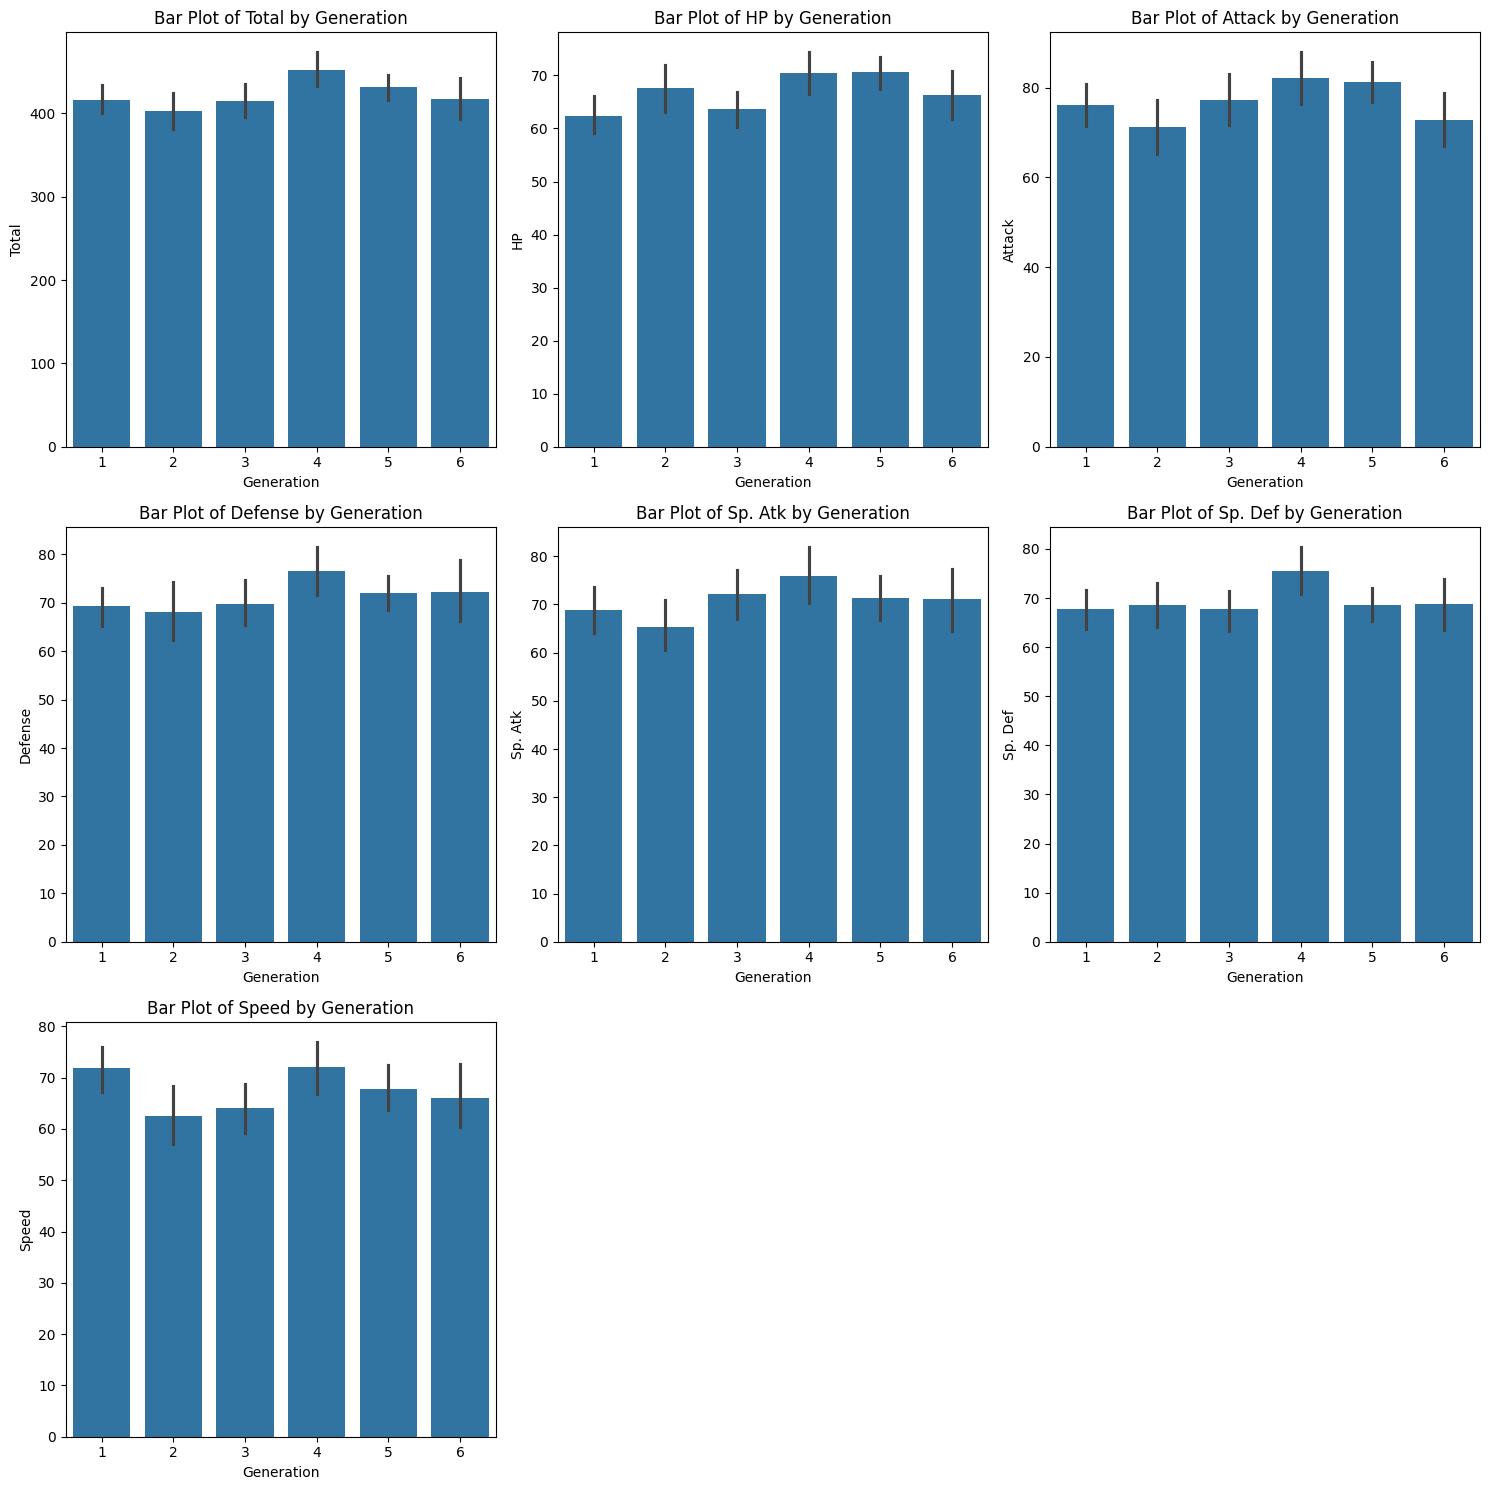

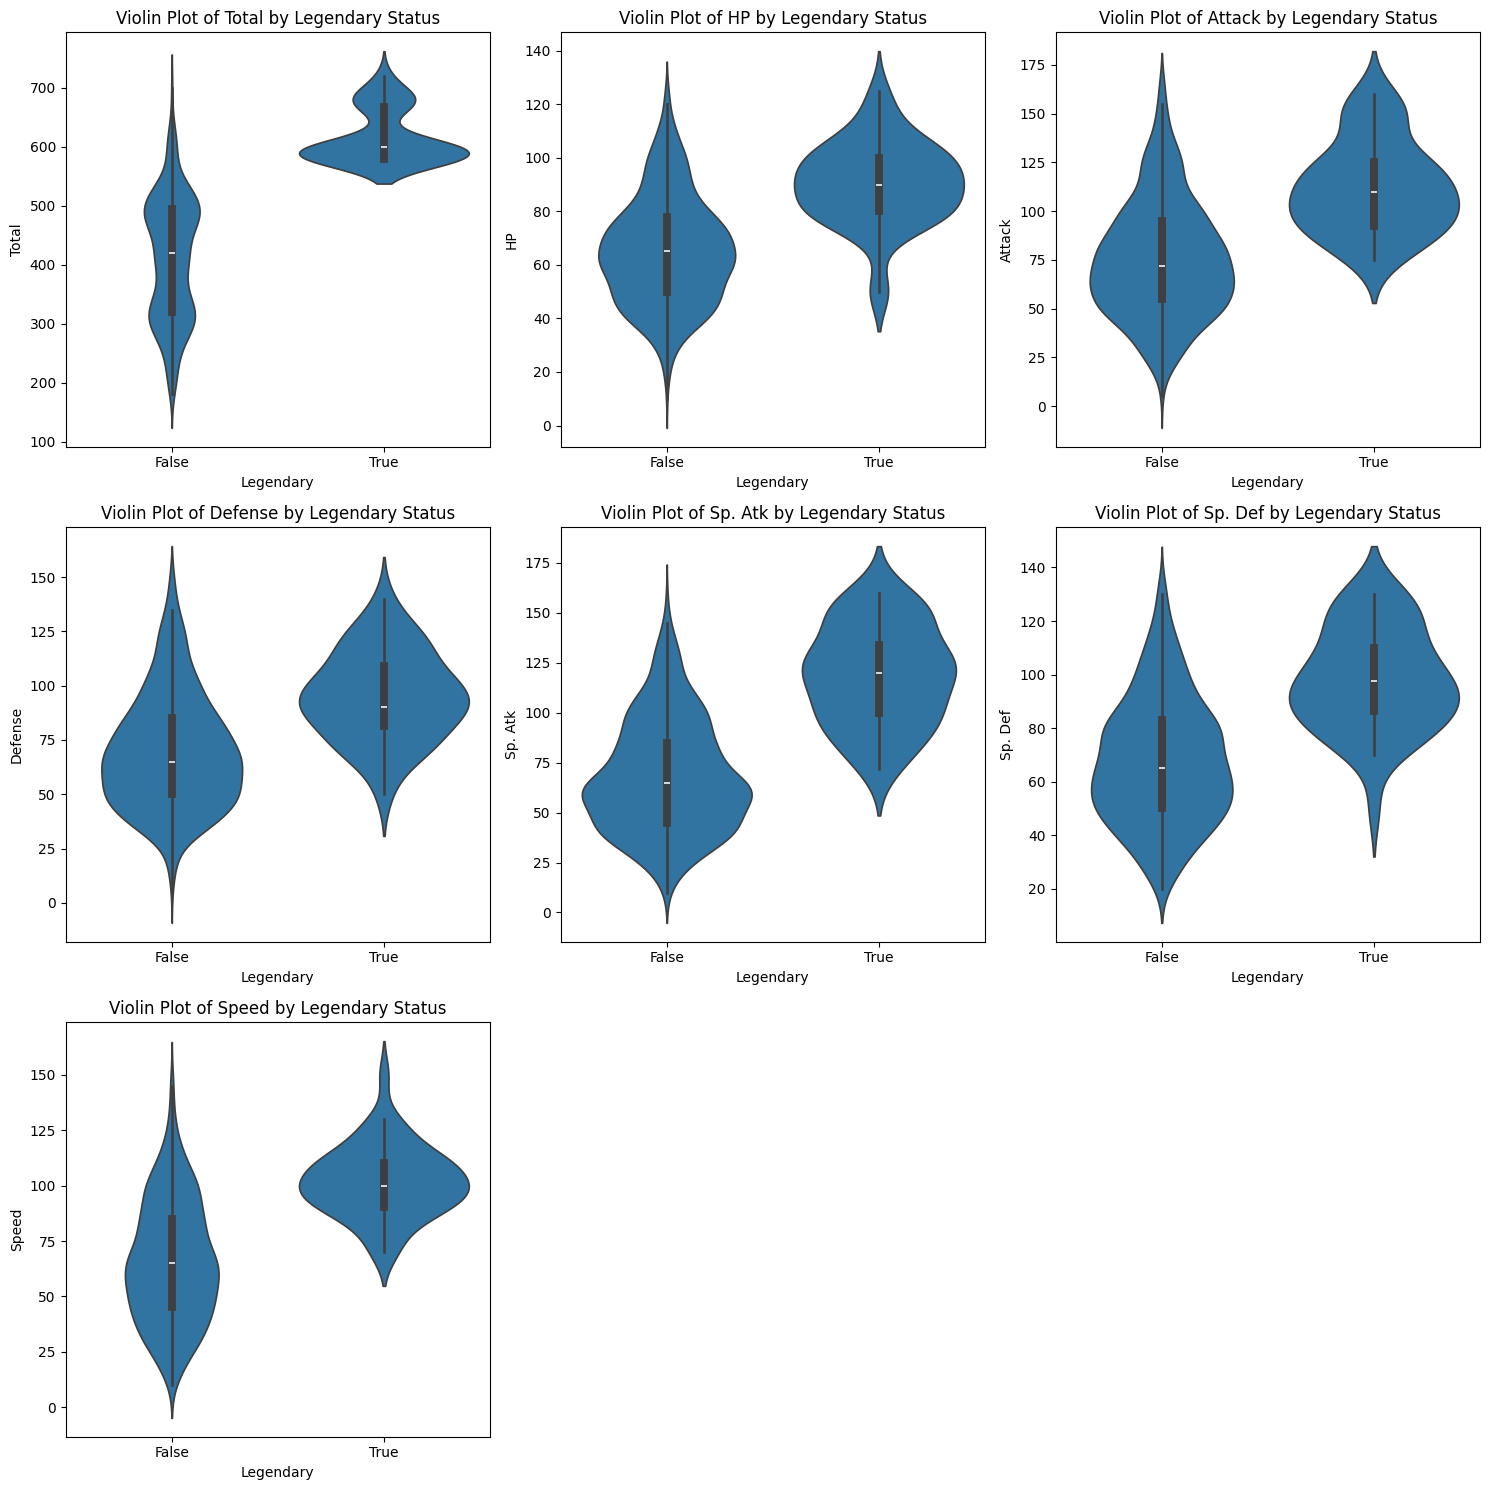

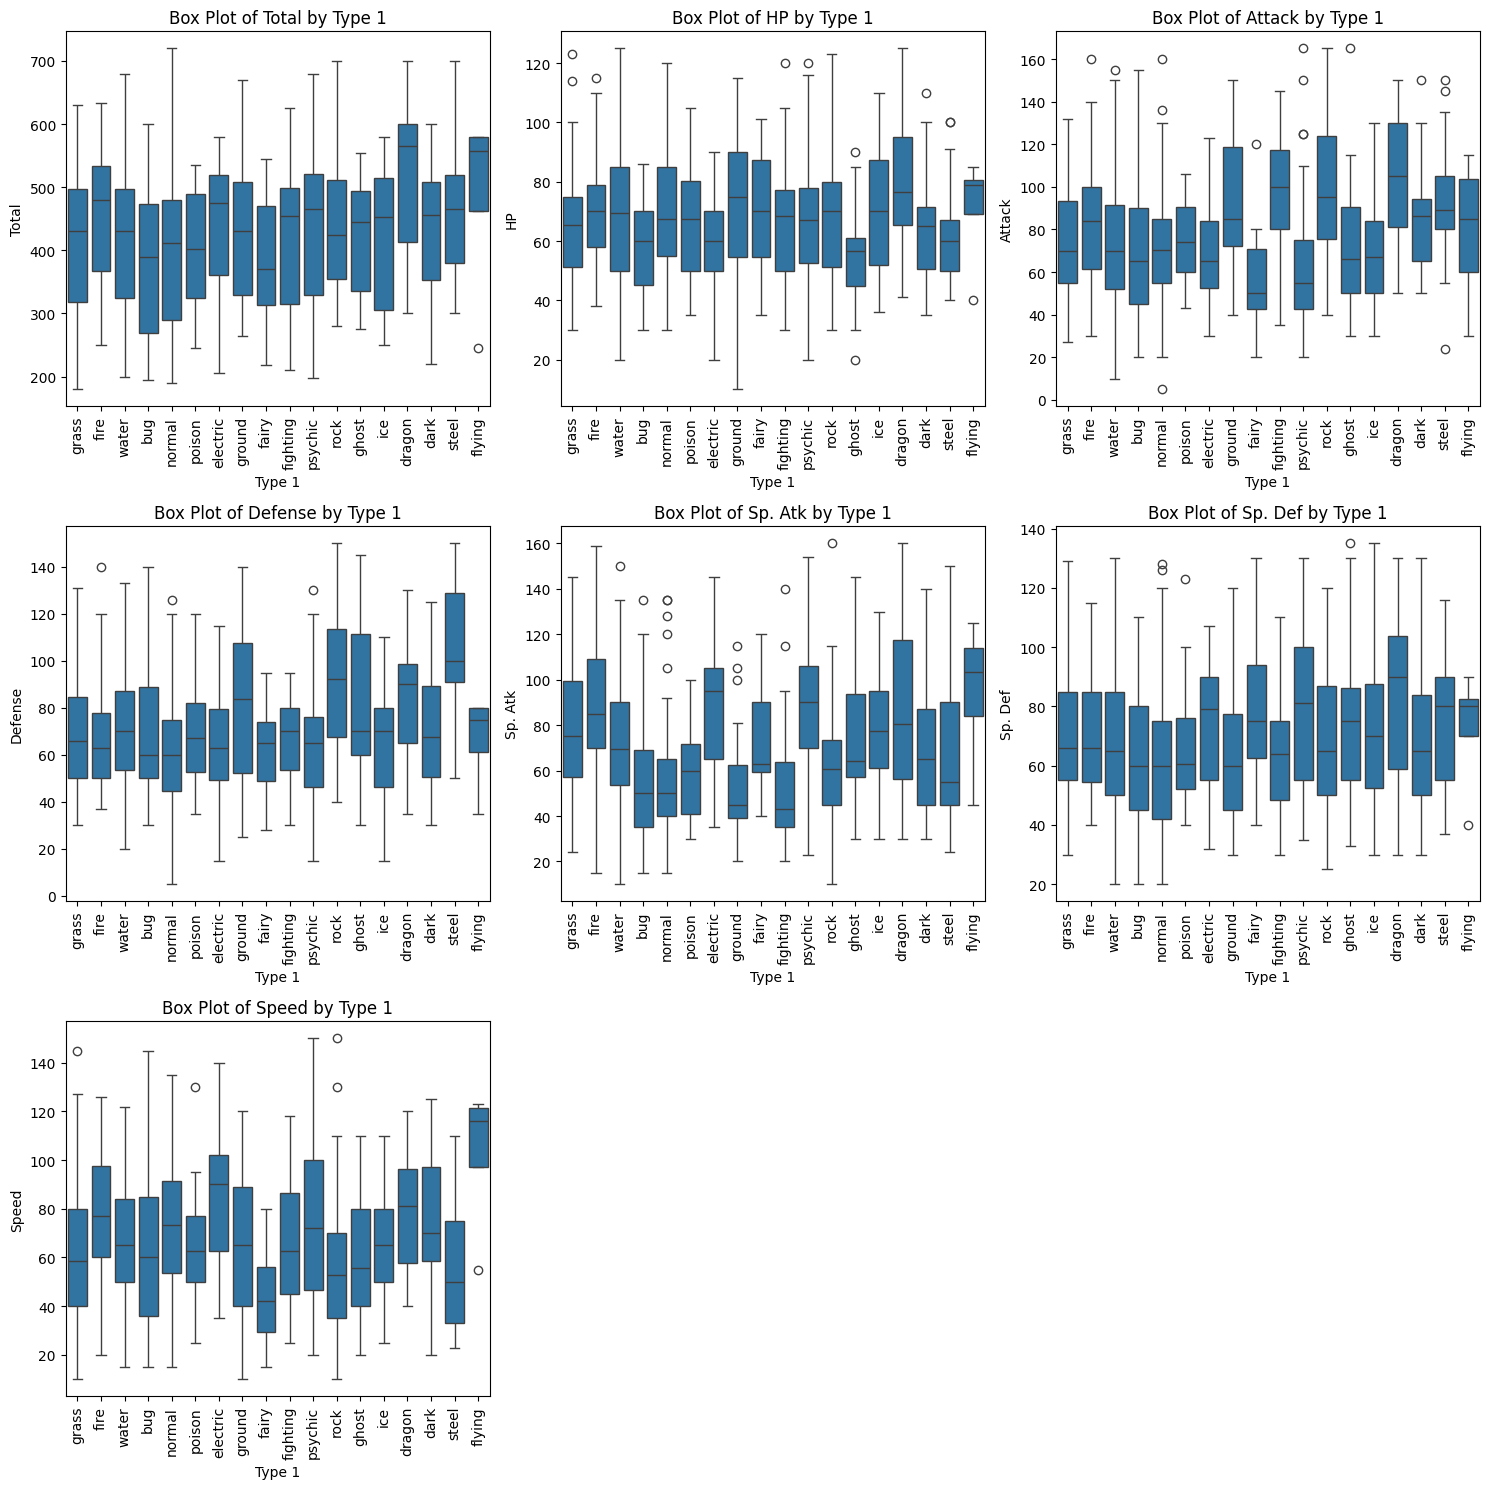

In [31]:
# Bar Plots, Violin Plots, and Box Plots for Categorical vs Numerical
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df["Generation"], y=df[col])
    plt.title(f'Bar Plot of {col} by Generation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=df["Legendary"], y=df[col])
    plt.title(f'Violin Plot of {col} by Legendary Status')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df["Type 1"], y=df[col])
    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {col} by Type 1')
plt.tight_layout()
plt.show()


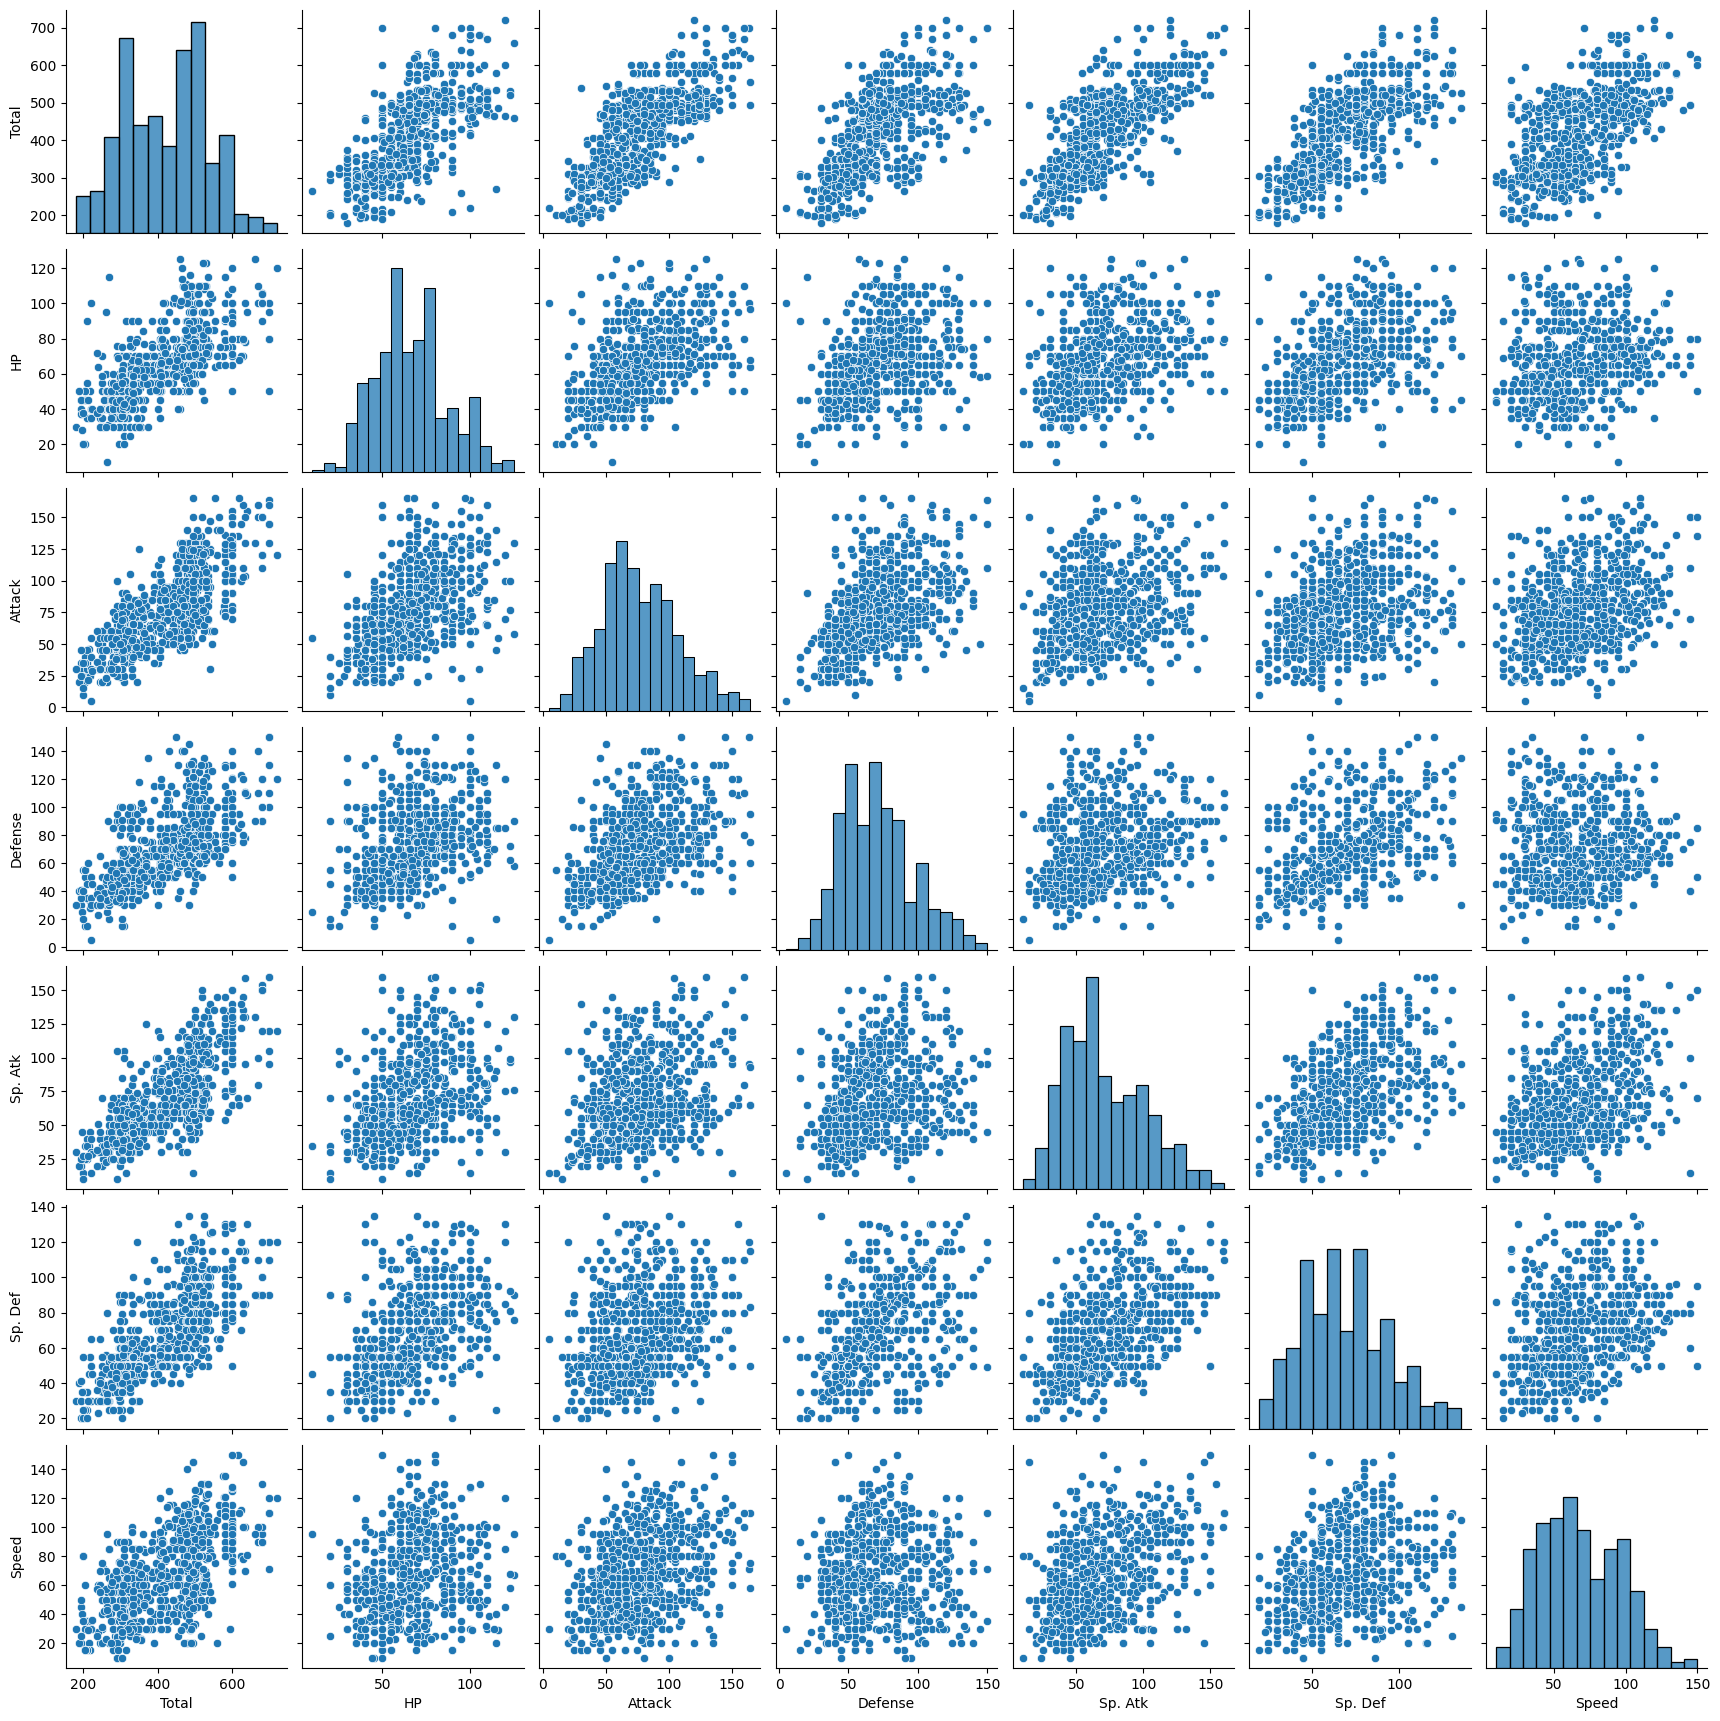

In [32]:
# Pair Plot for Multiple Relationships
sns.pairplot(df[numerical_columns])
plt.show()


<Figure size 1000x600 with 0 Axes>

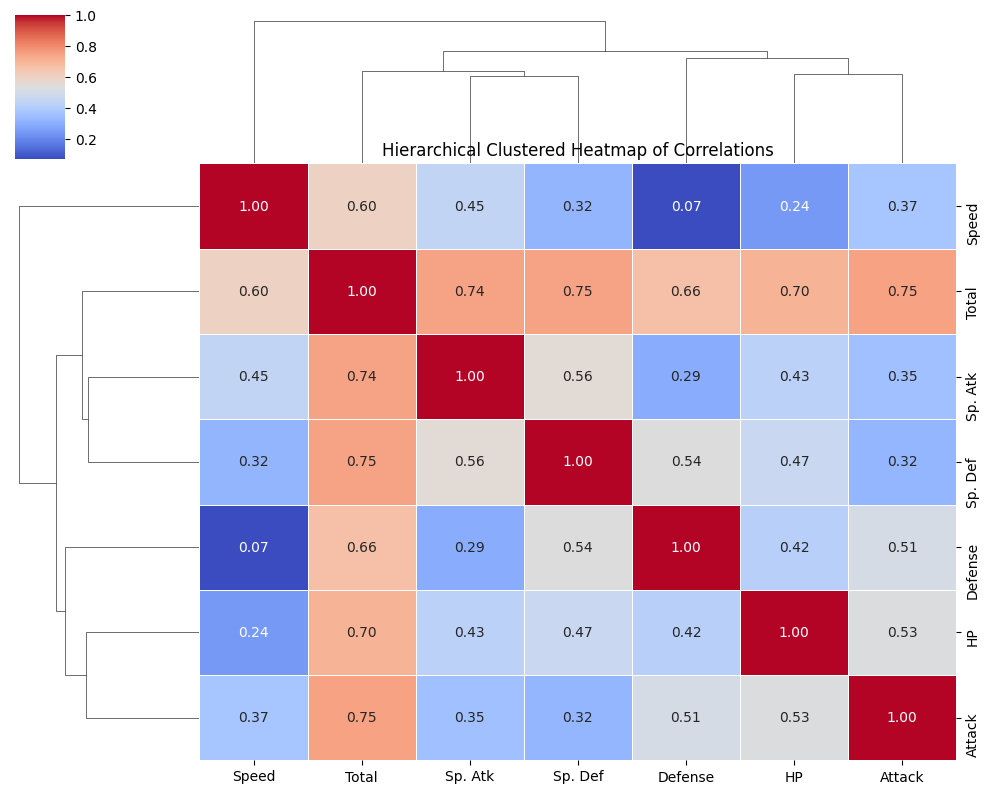

In [33]:
# Clustered Heatmap
plt.figure(figsize=(10, 6))
g = sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, figsize=(10, 8))
g.ax_heatmap.set_title("Hierarchical Clustered Heatmap of Correlations")
plt.show()


<Figure size 1500x1000 with 0 Axes>

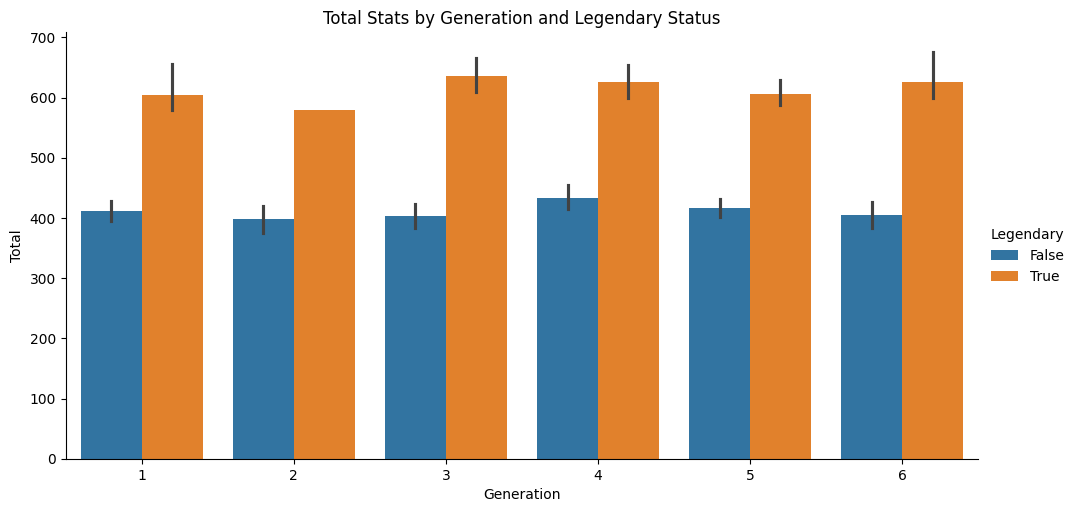

In [ ]:
# Grouped Comparisons for Combined Effects of Multiple Features
plt.figure(figsize=(15, 10))
sns.catplot(x="Generation", y="Total", hue="Legendary", kind="bar", data=df, aspect=2)
plt.title("Total Stats by Generation and Legendary Status")
plt.show()

sns.catplot(x="Type 1", y="Attack", hue="Legendary", kind="box", data=df, aspect=2)
plt.xticks(rotation=90)
plt.title("Attack Stats by Type 1 and Legendary Status")
plt.show()

sns.catplot(x="Type 1", y="Defense", hue="Generation", kind="violin", data=df, aspect=2)
plt.xticks(rotation=90)
plt.title("Defense Stats by Type 1 and Generation")
plt.show()
